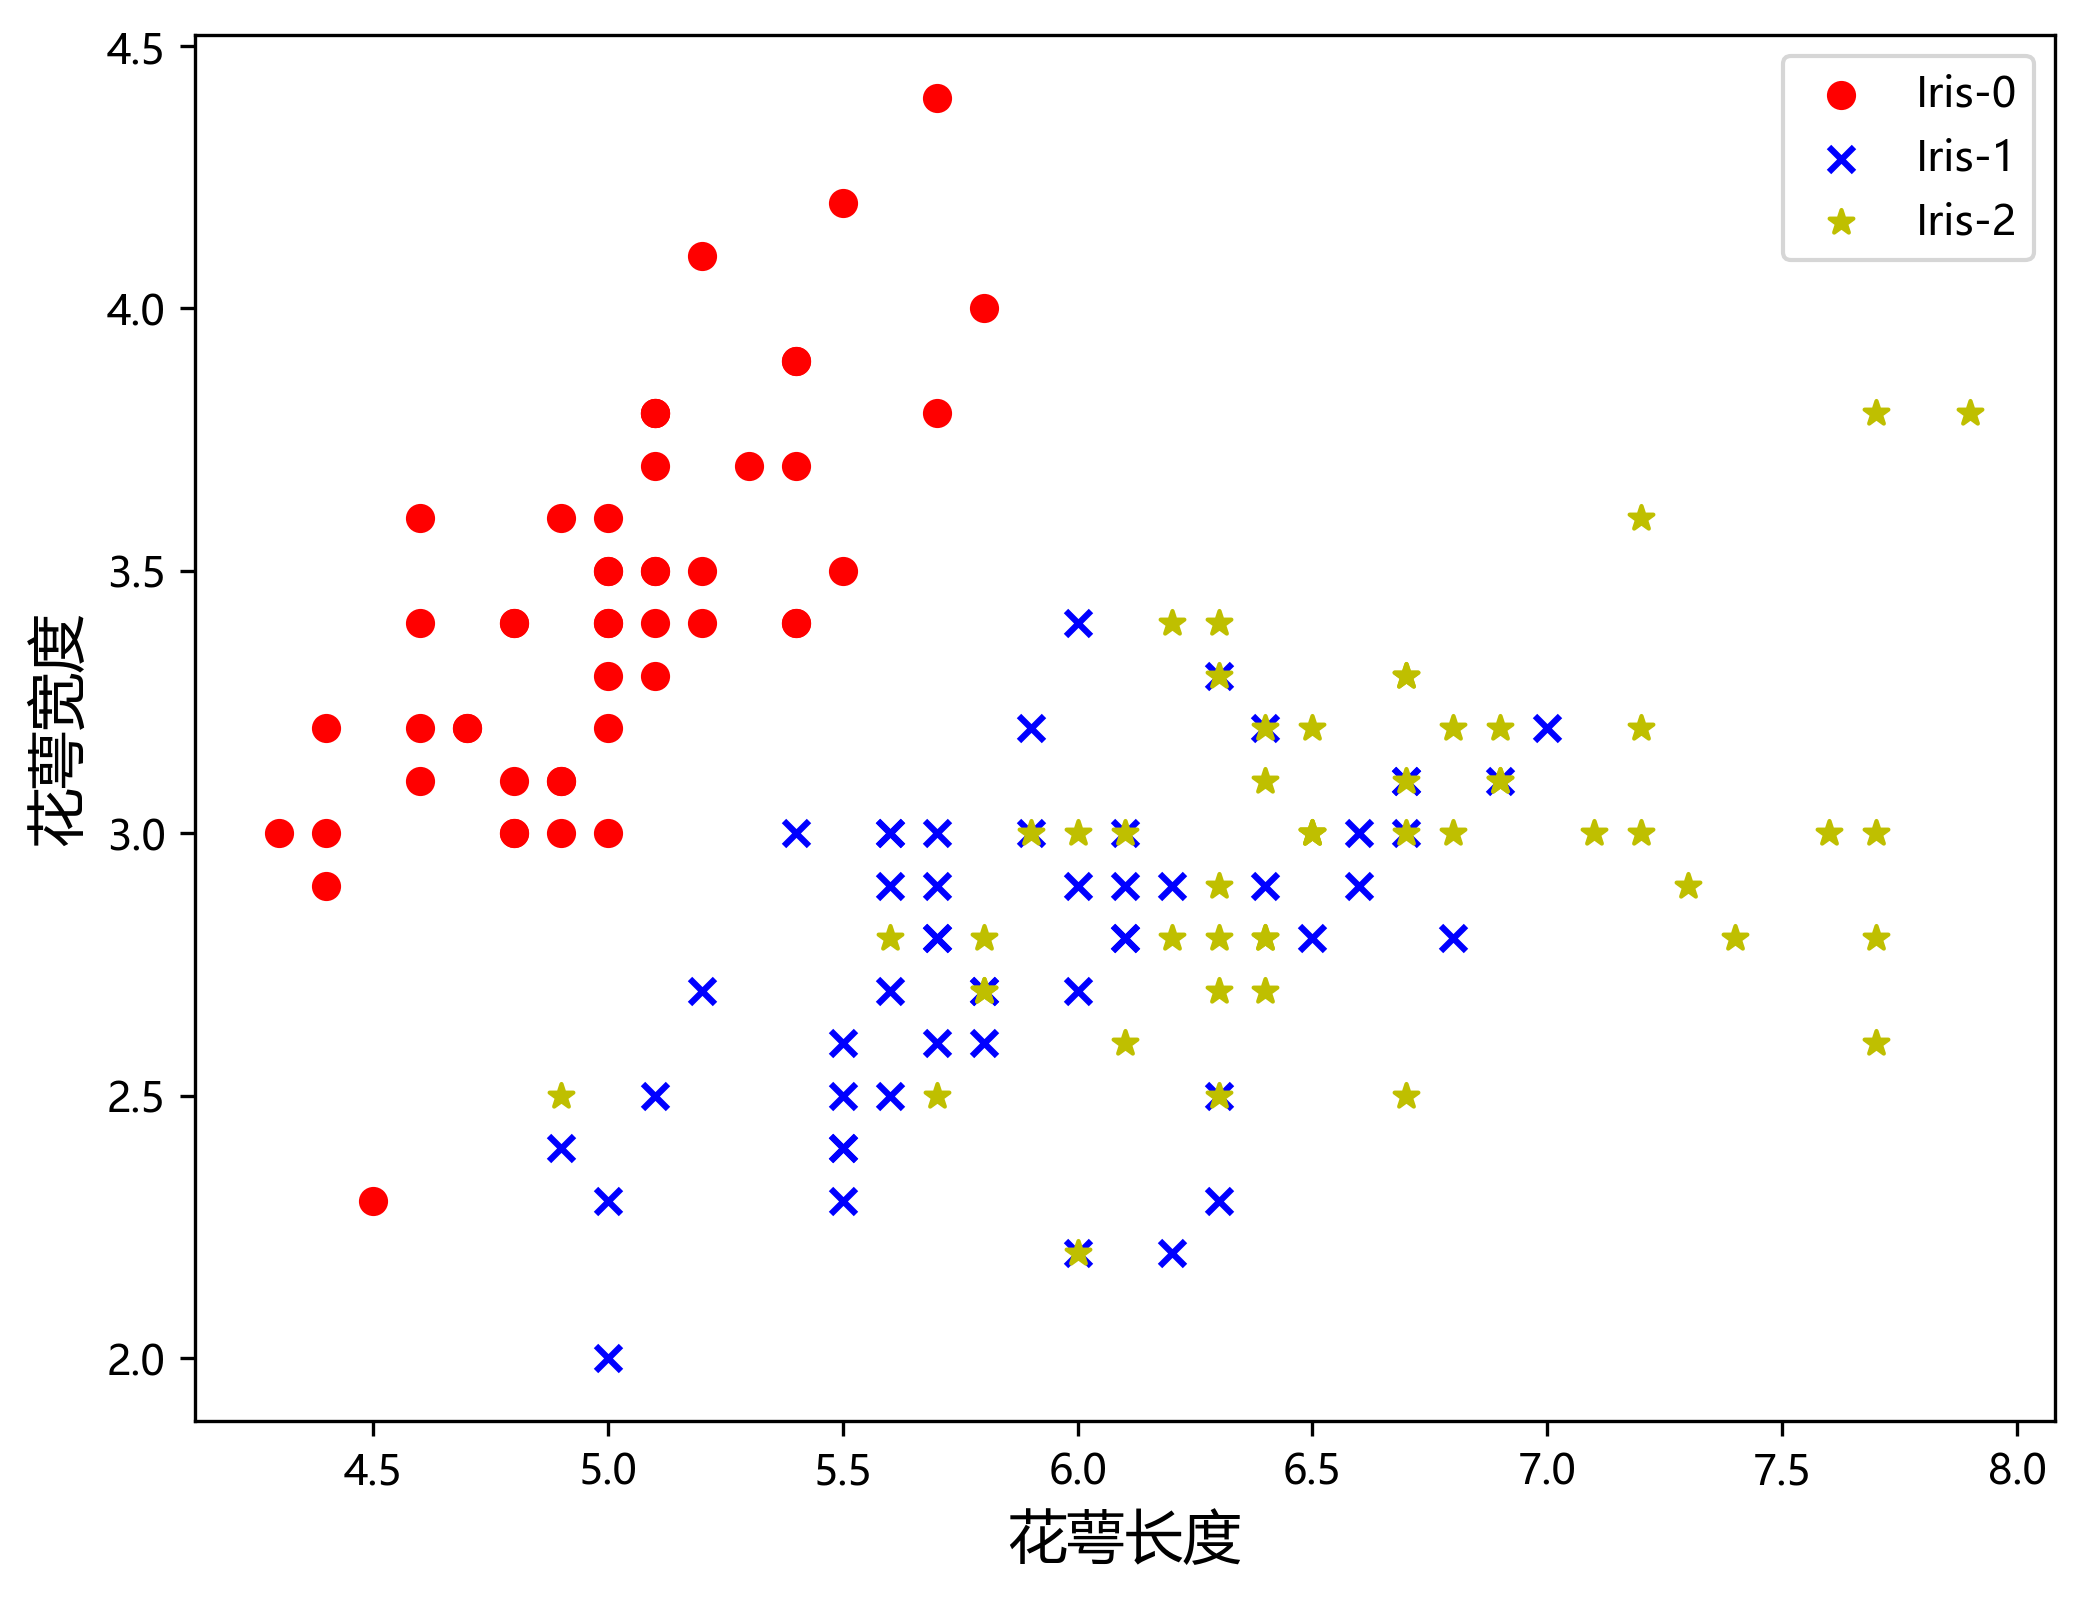

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
plt.rcParams['axes.unicode_minus'] = False

def visualize_scatter(x, y, label, marker, color):
    samples = x[y == label, :]
    # plt.figure(figsize=(16,12),dpi=300)
    plt.scatter(samples[:, 0], samples[:, 1], marker=marker, color=color, label=f'Iris-{label}')

def main():
    plt.figure(figsize=(8,6),dpi=300)
    iris = load_iris()

    x = iris.data[:, :2]
    y = iris.target

    visualize_scatter(x, y, 0, 'o', 'r')
    visualize_scatter(x, y, 1, 'x', 'b')
    visualize_scatter(x, y, 2, '*', 'y')

    plt.xlabel('花萼长度', fontsize=14)
    plt.ylabel('花萼宽度', fontsize=14)

    # 添加图例
    plt.legend()

    plt.show()

if __name__ == "__main__":
    main()

In [10]:
from sklearn.model_selection import train_test_split

# 加载鸢尾花数据集
iris = load_iris()

# 提取特征和标签
X = iris.data
y = iris.target

# 随机切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印训练集和测试集的大小
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (120, 4) (120,)
Test: (30, 4) (30,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 加载鸢尾花数据集
iris = load_iris()

# 提取特征和标签
X = iris.data
y = iris.target

# 随机切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 KNN 分类器
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn_classifier.fit(X_train, y_train)

# 在训练集上进行预测
train_predictions = knn_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy of training:", train_accuracy)

# 在测试集上进行预测
test_predictions = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy of testing:", test_accuracy)

Accuracy of training: 0.95
Accuracy of testing: 1.0


In [17]:
import requests
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

url = "http://www.cs.cmu.edu/afs/cs/project/theo-11/www/naive-bayes.html"
response = requests.get(url)
data = response.text.splitlines()

documents = [line.split() for line in data if len(line.split()) > 1]

labels = [line[0] for line in documents]
documents = [" ".join(line[1:]) for line in documents]

X_train, X_test, y_train, y_test = train_test_split(documents, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

predictions = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, predictions)
print("准确度:", accuracy)
print("\n分类报告:\n", classification_report(y_test, predictions, zero_division=1))


准确度: 0.0

分类报告:
                precision    recall  f1-score   support

         <!--       0.00      1.00      0.00       0.0
         <H1>       1.00      0.00      0.00       1.0
         <H3>       1.00      0.00      0.00       1.0
<H3>Newsgroup       1.00      0.00      0.00       1.0
       <LI><A       1.00      0.00      0.00       1.0
          Old       1.00      0.00      0.00       1.0
         This       1.00      0.00      0.00       1.0
       charge       1.00      0.00      0.00       1.0
     randomly       1.00      0.00      0.00       1.0
       source       1.00      0.00      0.00       1.0
         text       1.00      0.00      0.00       1.0
           to       1.00      0.00      0.00       1.0

     accuracy                           1.00      11.0
    macro avg       0.92      0.08      0.00      11.0
 weighted avg       1.00      0.00      0.00      11.0



In [19]:
from sklearn.feature_extraction.text import CountVectorizer

text_data = ["This is the first document.",
             "This document is the second document.",
             "And this is the third one.",
             "Is this the first document?"]

# 文本预处理和词袋向量化
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# 输出词汇表
print("词汇表:", vectorizer.get_feature_names_out())

# 输出向量化结果
print("Output:")
print(X.toarray())


词汇表: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Output:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [23]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# 加载20newsgroups数据集
newsgroups = fetch_20newsgroups(subset='train')

# 获取文本数据
text_data = newsgroups.data

# 使用TfidfVectorizer进行文本向量化
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# 输出第一个文本的向量表示
first_text_vector = X[0].toarray()
print("The vectorized presentation of the first text is:")
print(first_text_vector)

The vectorized presentation of the first text is:
[[0. 0. 0. ... 0. 0. 0.]]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 加载20newsgroups数据集
newsgroups = fetch_20newsgroups(subset='all')

# 获取文本数据和标签
X = newsgroups.data
y = newsgroups.target

# 使用TfidfVectorizer进行文本向量化
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 创建朴素贝叶斯分类器
nb_classifier = MultinomialNB()

# 训练模型
nb_classifier.fit(X_train, y_train)

# 在训练集上进行预测
train_predictions = nb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Tr_accu:", train_accuracy)

# 在测试集上进行预测
test_predictions = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Te_accu:", test_accuracy)

Tr_accu: 0.9246484478641549
Te_accu: 0.8445623342175066
